<a href="https://colab.research.google.com/github/hebaashraf21/Classical-and-Deep-Learning-Satellite-Imagery-Change-Detection/blob/main/change_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Add your libraries here
import numpy as np
import glob
import re
import tifffile
from google.colab import drive
import zipfile
import os
import matplotlib.pyplot as plt
from skimage import io
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
import torch
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split


In [21]:
# Mount Google Drive
drive.mount('/content/drive')

# Path to the zip file in your Google Drive
zip_file_path = '/content/drive/MyDrive/trainval.zip'

# Path to extract the dataset
extracted_path = '/content/dataset'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# Check the extracted files
extracted_files = os.listdir(extracted_path)
print("Extracted files:", extracted_files)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Extracted files: ['trainval']


In [22]:
def load_images(class_name):
    images = []
    dataset_path = '/content/dataset/trainval/'
    class_path = os.path.join(dataset_path, class_name)

    # Use glob to find files matching the pattern '*.png' and sort them numerically
    filenames = sorted(glob.glob(os.path.join(class_path, '*.png')), key=natural_sort_key)

    for filename in filenames:
        image = Image.open(filename)
        images.append(image)

    return images


# Load images for each class
a_images = load_images('A')
b_images = load_images('B')
label_images = load_images('label')

print("Number of A images:", len(a_images))
print("Number of B images:", len(b_images))
print("Number of label images:", len(label_images))

Number of A images: 4868
Number of B images: 4868
Number of label images: 4868


In [23]:
def split_images(images, test_size=0.2, random_state=42):
    train_images, val_images = train_test_split(images, test_size=test_size, random_state=random_state)
    return train_images, val_images

# Split images for each class
a_train_images, a_val_images = split_images(a_images)
b_train_images, b_val_images = split_images(b_images)
label_train_images, label_val_images = split_images(label_images)

print("Number of A train images:", len(a_train_images))
print("Number of A validation images:", len(a_val_images))
print("Number of B train images:", len(b_train_images))
print("Number of B validation images:", len(b_val_images))
print("Number of label train images:", len(label_train_images))
print("Number of label validation images:", len(label_val_images))

Number of A train images: 3894
Number of A validation images: 974
Number of B train images: 3894
Number of B validation images: 974
Number of label train images: 3894
Number of label validation images: 974


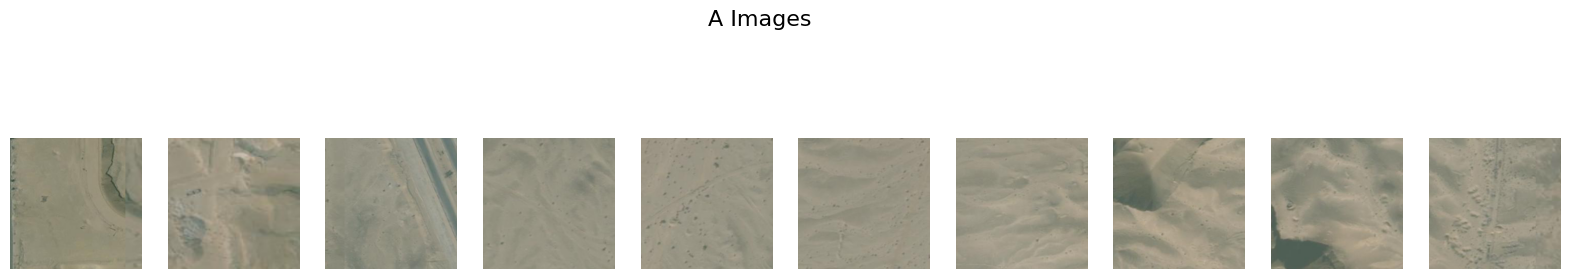

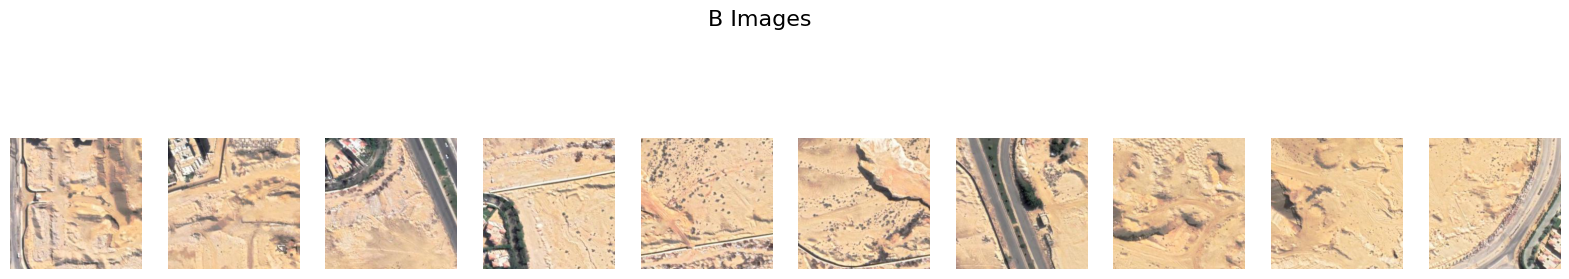

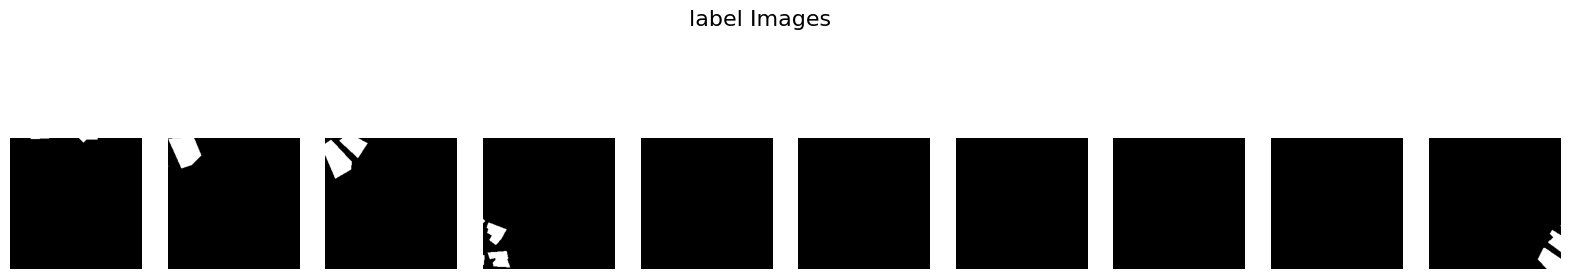

In [24]:
def display_images(images, title):
    fig, axs = plt.subplots(1, 10, figsize=(20, 4))
    fig.suptitle(title, fontsize=16)

    for i in range(10):
        img_array = np.array(images[i])
        if len(img_array.shape) == 3 and img_array.shape[2] == 4:  # Check if the image has an alpha channel
            img_array = img_array[:, :, :3]  # Display only RGB channels
        if len(img_array.shape) == 2:  # Grayscale image, convert to RGB
            img_array = np.stack((img_array,) * 3, axis=-1)
        axs[i].imshow(img_array)
        axs[i].axis('off')

    plt.show()

display_images(a_images[:10], 'A Images')
display_images(b_images[:10], 'B Images')
display_images(label_images[:10], 'label Images')
